# ECON441B HW2

# Ivy Qiu

# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [18]:
# difference in stockprice
df["Diff"] = df["Adj Close"].diff().shift(-1)

#Target up or down
df["Target"] = np.sign(df["Diff"])

#option premium
df["Premium"] = .08*df["Adj Close"]

In [19]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [21]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [28]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [29]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [30]:
df['Predictions'] = y_pred

In [44]:
df['Profits'] = 0.

#Ture Positives 
df.loc[(df['Predictions'] == 1) & (df["Target"] == 1), 
       "Profits"] = df["Premium"]

#False Positives 
df.loc[(df['Predictions'] == 1) & (df["Target"] == -1),
       "Profits"] = 100 * df["Diff"] + df["Premium"]

In [45]:
df.head()

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842


# 5.) Plot profits over time

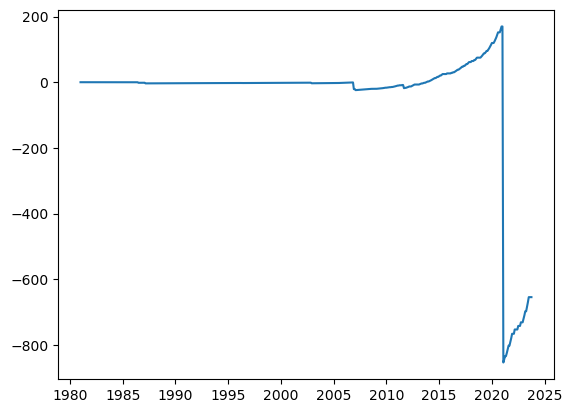

In [46]:
plt.plot(np.cumsum(df["Profits"]))

plt.show()

### 5.5) Write up: your skills form the MQE to help Mr.lius Ventures 

What we learn in machine learning can be leveraged to analyze market trends and make informed predictions. Given that Mr. Liu's ventures operate within a niche or "obscure" market, where conventional financial models might either be inapplicable or require substantial modifications, our skills in this domain could prove to be particularly valuable. This expertise enables us to navigate and interpret complex market dynamics, offering strategic insights that are tailored to the unique characteristics of these markets. 

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.